In [36]:
import pandas as pd
import numpy as np
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam, Nadam, Adagrad
import matplotlib.pyplot as plt

In [37]:
df = pd.read_csv("sensor-nodes.csv")

In [38]:
df.head()

,Node_ID,Timestamp,IP_Address,Packet_Rate,Packet_Drop_Rate,Packet_Duplication_Rate,Data_Throughput,Signal_Strength,SNR,Battery_Level,Energy_Consumption_Rate,Number_of_Neighbors,Route_Request_Frequency,Route_Reply_Frequency,Data_Transmission_Frequency,Data_Reception_Frequency,Error_Rate,CPU_Usage,Memory_Usage,Bandwidth,Is_Malicious
0,1,01-02-23 0:00,192.168.119.138,52.018229,2.727317,0.955687,130.967180,-52.059232,23.974265,82.982598,4.394328,3,11.323044,11.458199,20.670539,14.385439,0.109146,26.376693,29.186341,76.811986,0
1,2,01-02-23 0:01,192.168.225.56,59.504648,1.435058,1.228460,82.634358,-57.754723,22.572052,66.734853,4.795243,6,8.277362,8.832980,15.555122,14.316681,0.077136,34.963429,34.203177,112.495912,0
2,3,01-02-23 0:02,192.168.187.210,34.118204,1.320905,1.015245,61.649928,-52.399037,15.667076,74.593605,4.889509,5,8.196374,8.330227,19.470748,11.792084,0.052993,48.934585,31.682662,117.526109,0
3,4,01-02-23 0:03,192.168.78.245,39.643055,1.988791,0.784562,69.704181,-53.727443,20.286962,76.710564,3.698836,6,10.683766,6.525032,16.228955,8.895409,0.087810,47.045600,37.470027,123.058913,0
4,5,01-02-23 0:04,192.168.233.229,40.212679,1.005121,1.412193,123.445612,-49.696620,24.318538,84.477890,5.505750,7,11.176823,10.617432,12.257423,10.168739,0.068823,33.394354,26.582970,71.696911,0


In [39]:
X = df.drop(columns=['Node_ID', 'Timestamp', 'IP_Address', 'Is_Malicious'])
y = df['Is_Malicious']

In [40]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train_val, X_test, y_train_val, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (6000, 17)
Shape of X_val: (2000, 17)
Shape of X_test: (2000, 17)
Shape of y_train: (6000,)
Shape of y_val: (2000,)
Shape of y_test: (2000,)


In [41]:
sequence_length = X_train.shape[1]
num_features = 1

X_train_reshaped = np.expand_dims(X_train, axis=-1)
X_val_reshaped = np.expand_dims(X_val, axis=-1)
X_test_reshaped = np.expand_dims(X_test, axis=-1)

print("Sequence length: ", sequence_length)
print("Num of features: ", num_features)

Sequence length:  17
Num of features:  1


In [42]:
model = Sequential()
model.add(LSTM(units=32, input_shape=(sequence_length, num_features), kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
model.add(Dropout(0.5))
# model.add(Dense(units=1, activation='sigmoid'))

In [43]:
adam_optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=adam_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

adam_history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_val_reshaped, y_val))

Epoch 1/10
188/188 [==============================] - 3s 7ms/step - loss: 0.5540 - accuracy: 0.1318 - val_loss: 0.2721 - val_accuracy: 0.0020
Epoch 2/10
188/188 [==============================] - 1s 5ms/step - loss: 0.5087 - accuracy: 0.4040 - val_loss: 0.2248 - val_accuracy: 0.0010
Epoch 3/10
188/188 [==============================] - 1s 5ms/step - loss: 0.4297 - accuracy: 0.4332 - val_loss: 0.0842 - val_accuracy: 0.0000e+00
Epoch 4/10
188/188 [==============================] - 1s 5ms/step - loss: 0.4154 - accuracy: 0.4395 - val_loss: 0.0779 - val_accuracy: 0.0000e+00
Epoch 5/10
188/188 [==============================] - 1s 5ms/step - loss: 0.4116 - accuracy: 0.4530 - val_loss: 0.0731 - val_accuracy: 5.0000e-04
Epoch 6/10
188/188 [==============================] - 1s 5ms/step - loss: 0.4133 - accuracy: 0.4512 - val_loss: 0.0696 - val_accuracy: 5.0000e-04
Epoch 7/10
188/188 [==============================] - 1s 5ms/step - loss: 0.4052 - accuracy: 0.4488 - val_loss: 0.0714 - val_accurac

In [44]:
nadam_optimizer = Nadam(learning_rate=0.001)

model.compile(optimizer=nadam_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

nadam_history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_val_reshaped, y_val))

Epoch 1/10
188/188 [==============================] - 3s 7ms/step - loss: 0.4093 - accuracy: 0.4302 - val_loss: 0.0408 - val_accuracy: 0.0390
Epoch 2/10
188/188 [==============================] - 1s 5ms/step - loss: 0.3951 - accuracy: 0.4320 - val_loss: 0.0389 - val_accuracy: 0.0155
Epoch 3/10
188/188 [==============================] - 1s 5ms/step - loss: 0.3949 - accuracy: 0.4527 - val_loss: 0.0374 - val_accuracy: 0.0075
Epoch 4/10
188/188 [==============================] - 1s 5ms/step - loss: 0.3981 - accuracy: 0.4602 - val_loss: 0.0361 - val_accuracy: 0.0130
Epoch 5/10
188/188 [==============================] - 1s 5ms/step - loss: 0.3867 - accuracy: 0.4682 - val_loss: 0.0173 - val_accuracy: 0.0140
Epoch 6/10
188/188 [==============================] - 1s 5ms/step - loss: 0.3817 - accuracy: 0.4728 - val_loss: 0.0175 - val_accuracy: 0.0115
Epoch 7/10
188/188 [==============================] - 1s 5ms/step - loss: 0.3781 - accuracy: 0.4528 - val_loss: 0.0182 - val_accuracy: 0.0075
Epoch 

In [45]:
adagrad_optimizer = Adagrad(learning_rate=0.001)

model.compile(optimizer=adagrad_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

adagrad_history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_val_reshaped, y_val))

Epoch 1/10
188/188 [==============================] - 3s 7ms/step - loss: 0.3867 - accuracy: 0.4657 - val_loss: 0.0140 - val_accuracy: 0.0080
Epoch 2/10
188/188 [==============================] - 1s 5ms/step - loss: 0.3805 - accuracy: 0.4708 - val_loss: 0.0138 - val_accuracy: 0.0090
Epoch 3/10
188/188 [==============================] - 1s 5ms/step - loss: 0.3778 - accuracy: 0.4682 - val_loss: 0.0137 - val_accuracy: 0.0100
Epoch 4/10
188/188 [==============================] - 1s 5ms/step - loss: 0.3917 - accuracy: 0.4575 - val_loss: 0.0138 - val_accuracy: 0.0095
Epoch 5/10
188/188 [==============================] - 1s 5ms/step - loss: 0.3813 - accuracy: 0.4627 - val_loss: 0.0138 - val_accuracy: 0.0095
Epoch 6/10
188/188 [==============================] - 1s 5ms/step - loss: 0.3825 - accuracy: 0.4737 - val_loss: 0.0137 - val_accuracy: 0.0100
Epoch 7/10
188/188 [==============================] - 1s 5ms/step - loss: 0.3810 - accuracy: 0.4635 - val_loss: 0.0137 - val_accuracy: 0.0100
Epoch 

In [46]:
loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print("Test loss: ", loss)
print("Test accuracy: ", accuracy)

63/63 [==============================] - 0s 2ms/step - loss: 0.0124 - accuracy: 0.0065
Test loss:  0.012378123588860035
Test accuracy:  0.006500000134110451


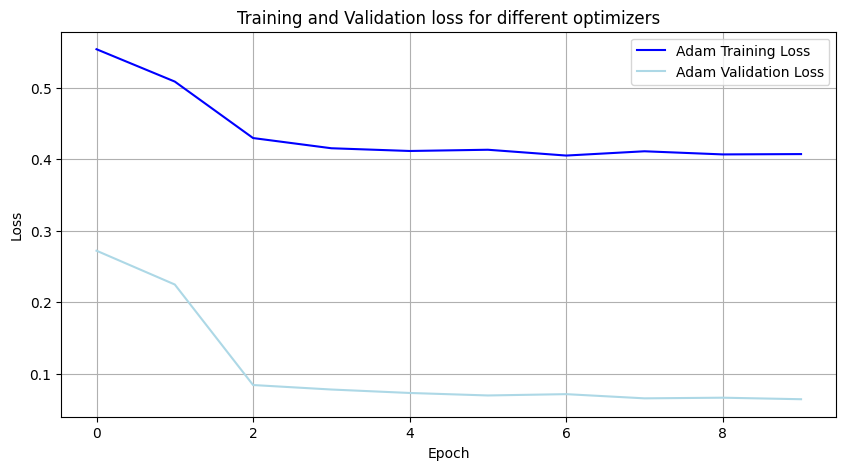

In [47]:
plt.figure(figsize=(10, 5))

plt.plot(adam_history.history['loss'], label="Adam Training Loss", color="blue")
plt.plot(adam_history.history['val_loss'], label="Adam Validation Loss", color="lightblue")

plt.title("Training and Validation loss for different optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

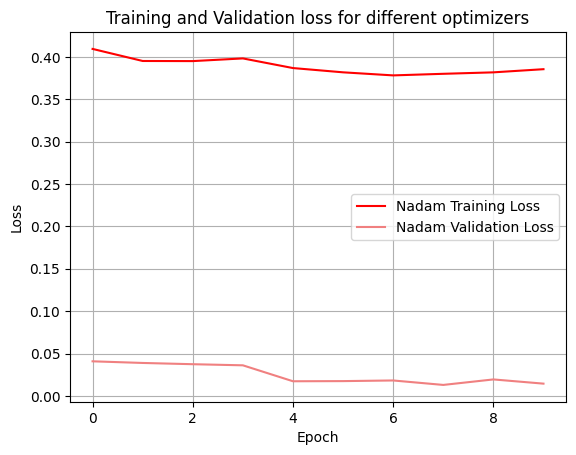

In [48]:
plt.plot(nadam_history.history['loss'], label="Nadam Training Loss", color="red")
plt.plot(nadam_history.history['val_loss'], label="Nadam Validation Loss", color="lightcoral")

plt.title("Training and Validation loss for different optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

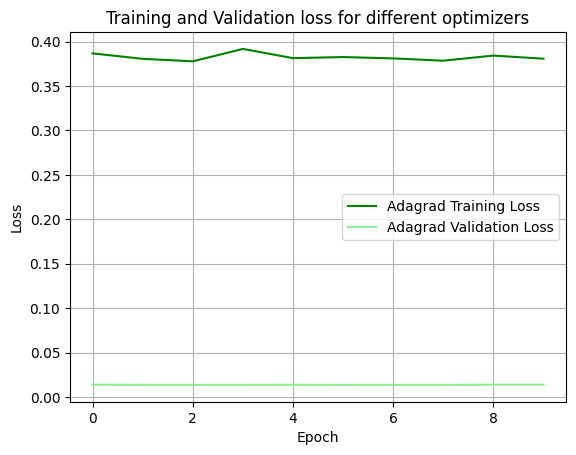

In [49]:
plt.plot(adagrad_history.history['loss'], label="Adagrad Training Loss", color="green")
plt.plot(adagrad_history.history['val_loss'], label="Adagrad Validation Loss", color="lightgreen")

plt.title("Training and Validation loss for different optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

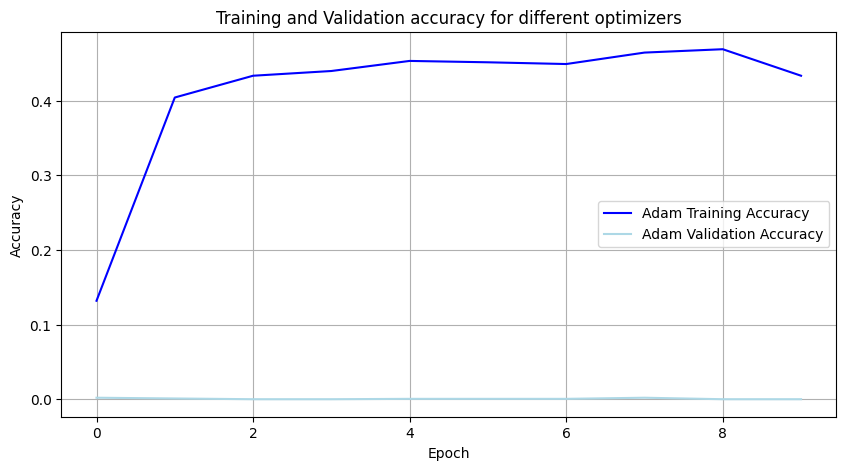

In [50]:
plt.figure(figsize=(10, 5))

plt.plot(adam_history.history['accuracy'], label="Adam Training Accuracy", color="blue")
plt.plot(adam_history.history['val_accuracy'], label="Adam Validation Accuracy", color="lightblue")

plt.title("Training and Validation accuracy for different optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

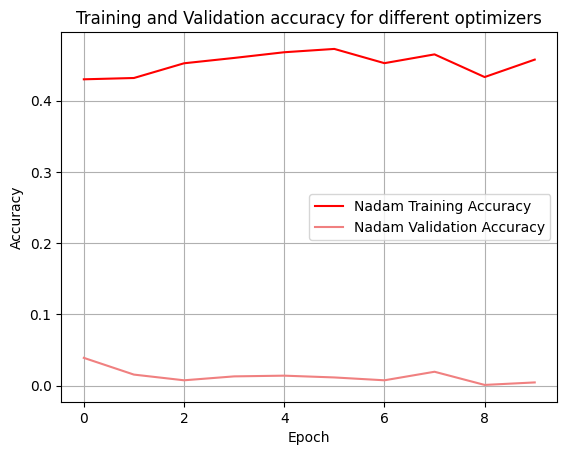

In [51]:
plt.plot(nadam_history.history['accuracy'], label="Nadam Training Accuracy", color="red")
plt.plot(nadam_history.history['val_accuracy'], label="Nadam Validation Accuracy", color="lightcoral")

plt.title("Training and Validation accuracy for different optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

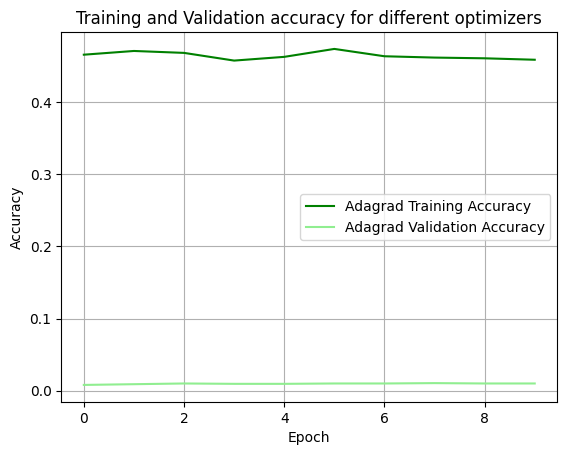

In [52]:
plt.plot(adagrad_history.history['accuracy'], label="Adagrad Training Accuracy", color="green")
plt.plot(adagrad_history.history['val_accuracy'], label="Adagrad Validation Accuracy", color="lightgreen")

plt.title("Training and Validation accuracy for different optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

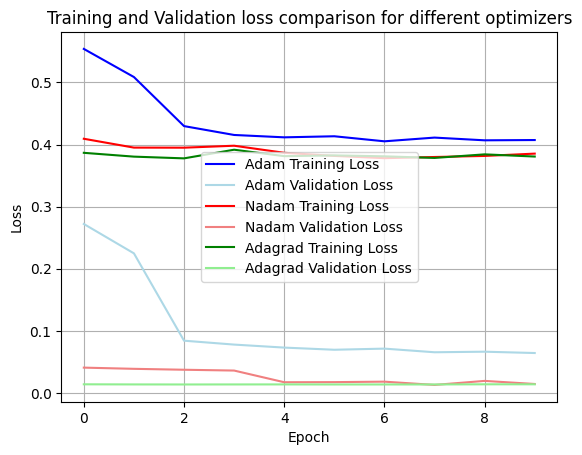

In [53]:
plt.plot(adam_history.history['loss'], label="Adam Training Loss", color="blue")
plt.plot(adam_history.history['val_loss'], label="Adam Validation Loss", color="lightblue")

plt.plot(nadam_history.history['loss'], label="Nadam Training Loss", color="red")
plt.plot(nadam_history.history['val_loss'], label="Nadam Validation Loss", color="lightcoral")

plt.plot(adagrad_history.history['loss'], label="Adagrad Training Loss", color="green")
plt.plot(adagrad_history.history['val_loss'], label="Adagrad Validation Loss", color="lightgreen")

plt.title("Training and Validation loss comparison for different optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

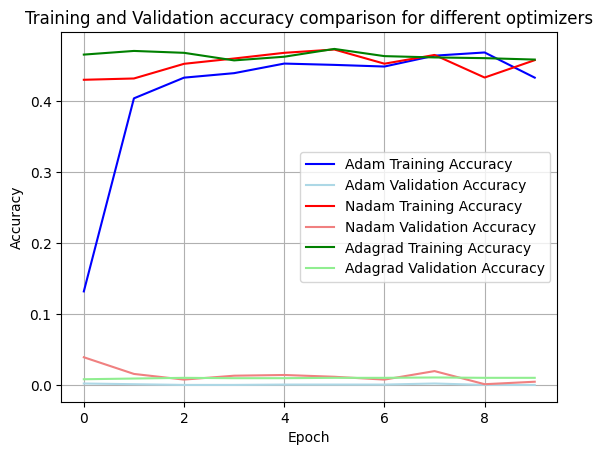

In [54]:
plt.plot(adam_history.history['accuracy'], label="Adam Training Accuracy", color="blue")
plt.plot(adam_history.history['val_accuracy'], label="Adam Validation Accuracy", color="lightblue")

plt.plot(nadam_history.history['accuracy'], label="Nadam Training Accuracy", color="red")
plt.plot(nadam_history.history['val_accuracy'], label="Nadam Validation Accuracy", color="lightcoral")

plt.plot(adagrad_history.history['accuracy'], label="Adagrad Training Accuracy", color="green")
plt.plot(adagrad_history.history['val_accuracy'], label="Adagrad Validation Accuracy", color="lightgreen")

plt.title("Training and Validation accuracy comparison for different optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()